In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

import json

import urllib.request

from mecab import MeCab
from gensim.models.word2vec import Word2Vec

### 1.네이버 영화 리뷰

In [4]:
# 데이터 받아오기
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt",filename='ratings.txt')
train_data = pd.read_table('ratings.txt')

In [8]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [9]:
len(train_data)

200000

In [10]:
# null값 확인 및 제거
train_data.isnull().sum()

id          0
document    8
label       0
dtype: int64

In [11]:
train_data.dropna(inplace=True, how='any')

In [12]:
train_data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [31]:
# 특수 문자, 숫자 삭제 
train_data['document'] = train_data['document'].apply(lambda x: re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", x))

In [34]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [36]:
# 불용어 정리
stop_words = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

mecab = MeCab()
tokenized = []
for sentence in train_data['document']:
    sent = mecab.morphs(sentence)
    sent = [word for word in sent if word not in stop_words]
    tokenized.append(sent)

In [37]:
tokenized[:5]

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'],
 ['디자인',
  '을',
  '배우',
  '학생',
  '외국',
  '디자이너',
  '그',
  '일군',
  '전통',
  '을',
  '통해',
  '발전',
  '해',
  '문화',
  '산업',
  '부러웠',
  '는데',
  '사실',
  '우리',
  '나라',
  '에서',
  '그',
  '어려운',
  '시절',
  '끝',
  '까지',
  '열정',
  '을',
  '지킨',
  '노라노',
  '같',
  '전통',
  '있',
  '어',
  '저',
  '같',
  '사람',
  '꿈',
  '을',
  '꾸',
  '고',
  '이뤄나갈',
  '수',
  '있',
  '다는',
  '것',
  '감사',
  '합니다'],
 ['폴리스', '스토리', '시리즈', '부터', '뉴', '까지', '버릴', '께', '하나', '없', '음', '최고'],
 ['연기',
  '진짜',
  '개',
  '쩔',
  '구나',
  '지루',
  '할거',
  '라고',
  '생각',
  '했',
  '는데',
  '몰입',
  '해서',
  '봤',
  '다',
  '그래',
  '이런',
  '게',
  '진짜',
  '영화',
  '지'],
 ['안개', '자욱', '밤하늘', '떠', '있', '초승달', '같', '영화']]

In [50]:
# DBOW word2vec 훈련
model = Word2Vec(sentences=tokenized, vector_size=100, window=5, min_count=5, workers=4, sg=0, epochs=10, seed=42)

In [51]:
model.wv.vectors.shape

(18140, 100)

In [52]:
model.wv.most_similar('생각')

[('고민', 0.5549648404121399),
 ('반성', 0.5292212963104248),
 ('의문', 0.5236720442771912),
 ('착각', 0.516623854637146),
 ('확신', 0.5010740756988525),
 ('자부', 0.4972153604030609),
 ('의아', 0.4823761582374573),
 ('깨닫', 0.476014643907547),
 ('느끼', 0.4668000340461731),
 ('돌아보', 0.4605846107006073)]

In [54]:
model.save('DBOW_ratings.bin')

In [57]:
model = Word2Vec(sentences=tokenized, vector_size=100, window=5, min_count=5, workers=4, epochs=10, sg=1)
model.wv.vectors.shape

(18140, 100)

In [58]:
model.wv.most_similar('생각')

[('의구심', 0.6608565449714661),
 ('해야할까', 0.6137260794639587),
 ('맹세', 0.6105563640594482),
 ('자부', 0.6083932518959045),
 ('수목장', 0.5849494934082031),
 ('불러야', 0.5725430250167847),
 ('돌아보', 0.5693339109420776),
 ('돌이켜', 0.5644230842590332),
 ('행복감', 0.5614123940467834),
 ('애착', 0.5613564848899841)]

In [60]:
model.save('Skipgram_ratings.bin')

### 2. 국립국어원 구어 말뭉치 (2022 일상 대화)

In [104]:
# 한 사람이 말한 내용 한 문장으로 만들기 (test)
path = 'NIKL_DIALOGUE_2022_v1.0/SDRW220000{:0>4}.json'.format(1)
with open(path) as file:
    json_data = json.load(file)
    for utterance in json_data['document'][0]['utterance']:
        if utterance['id']=='SDRW220000{:0>4}.1.1.1'.format(1):
            print(utterance['speaker_id'])
        else:
            if(previous!=utterance['speaker_id']):
                print(utterance['speaker_id'])
        previous = utterance['speaker_id']

SD2200007
SD2200006
SD2200005
SD2200007
SD2200005
SD2200007
SD2200005
SD2200007
SD2200005
SD2200007
SD2200006
SD2200007
SD2200006
SD2200007
SD2200006
SD2200007
SD2200005
SD2200006
SD2200007
SD2200005
SD2200007
SD2200006
SD2200007
SD2200006
SD2200005
SD2200006
SD2200005
SD2200007
SD2200005
SD2200006
SD2200007
SD2200006
SD2200007
SD2200006
SD2200007
SD2200006
SD2200007
SD2200006
SD2200005
SD2200006
SD2200005
SD2200006
SD2200005
SD2200006
SD2200007
SD2200005
SD2200007
SD2200005
SD2200007
SD2200006
SD2200005
SD2200006
SD2200005
SD2200006
SD2200005
SD2200007
SD2200006
SD2200007
SD2200005
SD2200007
SD2200006
SD2200007
SD2200006
SD2200007
SD2200005
SD2200007
SD2200005
SD2200007
SD2200005
SD2200007
SD2200005
SD2200007
SD2200006
SD2200007
SD2200006
SD2200007
SD2200005
SD2200007
SD2200005
SD2200007
SD2200005
SD2200006
SD2200005
SD2200007
SD2200006
SD2200007
SD2200006
SD2200007
SD2200006
SD2200007
SD2200006
SD2200005
SD2200007
SD2200006
SD2200007
SD2200005
SD2200007
SD2200005
SD2200007
SD2200005


In [121]:
# 1부터 2854개의 json data를 수집.
corpus = []
for i in range(1, 2855):
    path = 'NIKL_DIALOGUE_2022_v1.0/SDRW220000{:0>4}.json'.format(i)
    
    try:
        with open(path) as file:
            json_data = json.load(file)

            # 발화자 한 명이 이어서 말한 말들이 한 문장으로 들어가도록 함.
            one_sentence = ""
            for utterance in json_data['document'][0]['utterance']:
                # 대화의 첫 문장인 경우, 별다른 조건 없이 one_sentence에 추가
                if utterance['id']=='SDRW220000{:0>4}.1.1.1'.format(i):
                    one_sentence += (utterance['form'])
                
                # 대화의 마지막 문장인 경우, 그 마지막 문장을 corpus에 추가.
                elif utterance==json_data['document'][0]['utterance'][-1]:
                    if(previous!=utterance['speaker_id']):
                        corpus.append(one_sentence)
                        one_sentence=""
                        one_sentence += (utterance['form'])
                        corpus.append(one_sentence)
                    else:
                        one_sentence += (" "+ utterance['form'])
                        corpus.append(one_sentence)
                
                # 첫문장도 마지막 문장도 아닌 경우
                else:
                    if(previous!=utterance['speaker_id']):
                        corpus.append(one_sentence)
                        one_sentence=""
                        one_sentence += (utterance['form'])
                    else:
                        one_sentence += (" "+ utterance['form'])
                        
                previous = utterance['speaker_id'] # 현재 대화의 화자를 previous(직전 화자)변수에 집어넣음.           
    
    except:
        print('there is no such file called {}'.format(path))

there is no such file called NIKL_DIALOGUE_2022_v1.0/SDRW2200000095.json
there is no such file called NIKL_DIALOGUE_2022_v1.0/SDRW2200000107.json
there is no such file called NIKL_DIALOGUE_2022_v1.0/SDRW2200000381.json
there is no such file called NIKL_DIALOGUE_2022_v1.0/SDRW2200000382.json
there is no such file called NIKL_DIALOGUE_2022_v1.0/SDRW2200000383.json
there is no such file called NIKL_DIALOGUE_2022_v1.0/SDRW2200000392.json
there is no such file called NIKL_DIALOGUE_2022_v1.0/SDRW2200000393.json
there is no such file called NIKL_DIALOGUE_2022_v1.0/SDRW2200000394.json
there is no such file called NIKL_DIALOGUE_2022_v1.0/SDRW2200000395.json
there is no such file called NIKL_DIALOGUE_2022_v1.0/SDRW2200000400.json
there is no such file called NIKL_DIALOGUE_2022_v1.0/SDRW2200000401.json
there is no such file called NIKL_DIALOGUE_2022_v1.0/SDRW2200000402.json
there is no such file called NIKL_DIALOGUE_2022_v1.0/SDRW2200000404.json
there is no such file called NIKL_DIALOGUE_2022_v1.

In [122]:
len(corpus)

270757

In [136]:
corpus[:141] # 첫 번쨰 대화

['어 여기서 학교 얘기가 나와서 아마 여기서 학력이 제일 높은 사람이 말하는 게 낫 낫지 않을까? 너랑 아 name1랑 나는 아직 학교를 졸업을 안했으니까 그래서 대학을 졸업한 먼저 배우신 분한테 말을 넘기는 게 나을 것 같아.',
 '그래. 다들 전공이 어떻게 돼?',
 '나는 경영학을 전공을 하고 있어. name2는 어떻게 되니?',
 '나도 너랑 같은 경영학을 전공하고 있어.',
 '맞다 우리 18 학번 동기였지.',
 '응 너무 오랜만에 봤다.',
 '그러게 우리 얼마만에 봤지?',
 '우리 한 3개월 만에 본 거 같은데도 까먹은 거야?',
 '미안하다. 나도 최근에 너무 바빠서.',
 '응 알겠어. name3는 뭘 전공했어?',
 '나는 법학을 전공했고 복수 전공으론 사회복지학을 전공했어.',
 '복수 전공으로 사회 사회복지학?',
 '어.',
 '두 개 학 같이 학위 받느라 힘들진 않았어?',
 '괜찮았던 거 같아 생각보다.',
 '그랬구나.',
 'name3는 정말 엘리트구나.',
 '고마워. 경영학과도 힘들다고 들었는데 경영학 공부는 어떻게 해?',
 '나는 사실 분야를 하나 정해서 공부하니까 그렇게 막막하진 않았어. name1는 어때?',
 '나도 너와 마찬가지로 어 분야를 하나 정해서 뭐 전문적으로 공부를 하고 있는데 음 나로서는 이게 더 맞는 선택인 거 같아. 나랑 공부 스타일이 잘 맞아.',
 '내 생각에는 경영학과에서 분야를 1가지 안 정하고 공부를 하면은 너무 막막해서 힘들 거 같아. 혹시 법학에도 분야가 있어서 하나를 파고들어야 돼 법학도?',
 '법학은 과목이 많긴 한데 그렇게 한 분야로 정할 수 있는 진로는 있을 수 있을 거 같아. 뭐 노무사 변호사 등등. 하나로 정하면 좋긴 한데 보통 대부분 법학과는 공무원 준비를 많이 하는 거 같아.',
 '그러면은 주로 정부 기관같이 행정법 같은 거를 많이 공부를 하겠네?',
 '공무원의 기본 과목이 행정법이니까 행정법을 많이 듣긴 하더라.',
 '나도 행정법을 좀 공부를 해 봐서 하는데 

In [137]:
# corpus 저장해두기
file_path='raw_corpus.txt'
with open(file_path, 'w', encoding='utf-8') as file:
    for form in corpus:
        file.write(form + '\n')

In [138]:
# tokenize using mecab
mecab = MeCab()

tokenized_words=[]
for sentence in corpus:
    tokens = [word for word, tag in mecab.pos(sentence) if tag.startswith(('N', 'V', 'M'))] # 명사, 동사, 형용사, 부사인 형태소만 포함
    tokenized_words.append(tokens)

In [139]:
tokenized_words[:10]

[['여기',
  '학교',
  '얘기',
  '나와서',
  '아마',
  '여기',
  '학력',
  '제일',
  '높',
  '사람',
  '말',
  '게',
  '낫',
  '낫',
  '않',
  '너',
  '나',
  '아직',
  '학교',
  '졸업',
  '안',
  '했',
  '그래서',
  '대학',
  '졸업',
  '먼저',
  '배우',
  '분',
  '말',
  '넘기',
  '게',
  '나을',
  '것',
  '같'],
 ['다', '전공', '어떻게', '돼'],
 ['나', '경영학', '전공', '하', '있', '어떻게', '되'],
 ['나', '너', '같', '경영학', '전공', '있'],
 ['맞', '우리', '학번', '동기', '였'],
 ['너무', '오랜만', '봤'],
 ['우리', '얼마', '만', '봤'],
 ['우리', '한', '개월', '만', '본', '거', '같', '까먹', '거', '야'],
 ['미안', '나', '최근', '너무', '바빠서'],
 ['알', '뭘', '전공']]

In [140]:
# DBOW/Skip-gram word2vec 학습 
dbow_model = Word2Vec(sentences=tokenized_words, vector_size=100, window=3, min_count=5, sg=0, workers=4, epochs=10)
skipgram_model = Word2Vec(sentences=tokenized_words, vector_size=100, window=3, min_count=5, sg=1, workers=4, epochs=10)

In [160]:
print(dbow_model.wv.most_similar('전공'))
print(skipgram_model.wv.most_similar('전공'))

[('과목', 0.7134302854537964), ('학과', 0.7129000425338745), ('경제학', 0.6857386827468872), ('경영학', 0.6825366020202637), ('복수', 0.6792657971382141), ('화학', 0.6730360984802246), ('공학', 0.6635086536407471), ('과학', 0.6555315852165222), ('국어', 0.6437403559684753), ('과', 0.6410014629364014)]
[('학과', 0.7474499940872192), ('경영학', 0.7428977489471436), ('경제학', 0.7424380779266357), ('법학', 0.7308820486068726), ('영문학', 0.7273604869842529), ('편입', 0.7159811854362488), ('교재', 0.7107754945755005), ('복전', 0.7100896239280701), ('문과', 0.7039082646369934), ('교육학', 0.6967872381210327)]


In [144]:
dbow_model.save('DBOW_corpus.bin')
skipgram_model.save('Skipgram_corpus.bin')

In [150]:
print(dbow_model.wv.vectors.shape)
print(skipgram_model.wv.vectors.shape)

(18777, 100)
(18777, 100)


### 3. Visualization

In [146]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

In [155]:
import matplotlib.font_manager

fonts = [f.name for f in matplotlib.font_manager.fontManager.ttflist]
if 'AppleGothic' in fonts:
    print(True)

True


In [156]:
plt.rcParams['font.family'] = 'AppleGothic'

/Users/yor/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yor/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/yor/miniforge3/envs/tf/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


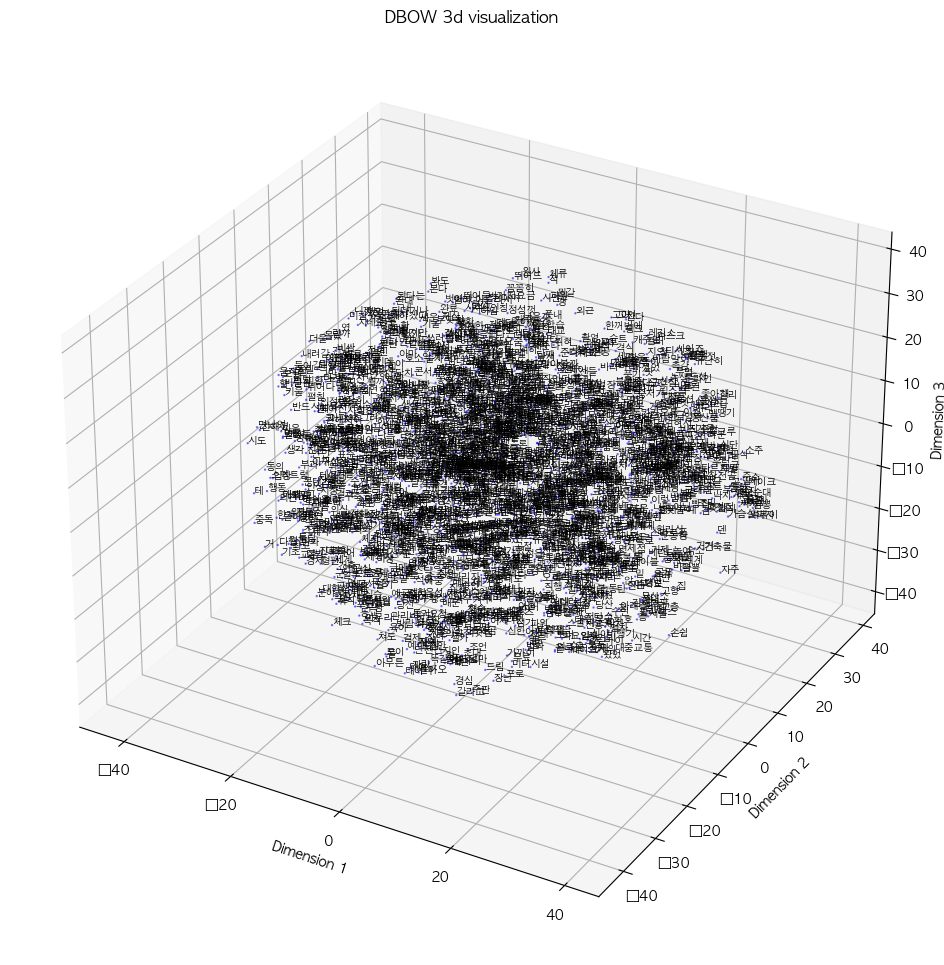

In [175]:
# 3d visulization_dbow
words = list(dbow_model.wv.index_to_key)
vectors = [dbow_model.wv.get_vector(word) for word in words]
vectors = np.array(vectors)

tsne = TSNE(n_components=3, random_state=42)
vectors_3d = tsne.fit_transform(vectors)

subsample_ratio=0.1
subsample_indices = np.random.choice(len(words), size=int(len(words)*subsample_ratio), replace=False)
subsample_words = [words[i] for i in subsample_indices]
subsample_vectors_3d = vectors_3d[subsample_indices]

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(subsample_vectors_3d[:, 0], subsample_vectors_3d[:, 1], subsample_vectors_3d[:,2], c='blue', alpha=0.5, s=0.5)

for i, word in enumerate(subsample_words):
    ax.text(subsample_vectors_3d[i, 0], subsample_vectors_3d[i, 1], subsample_vectors_3d[i, 2], word, fontsize=7)

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

plt.title('DBOW 3d visualization')
plt.show()

In [176]:
plt.savefig('DBOW_visualization.png')

<Figure size 640x480 with 0 Axes>

/Users/yor/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yor/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/yor/miniforge3/envs/tf/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


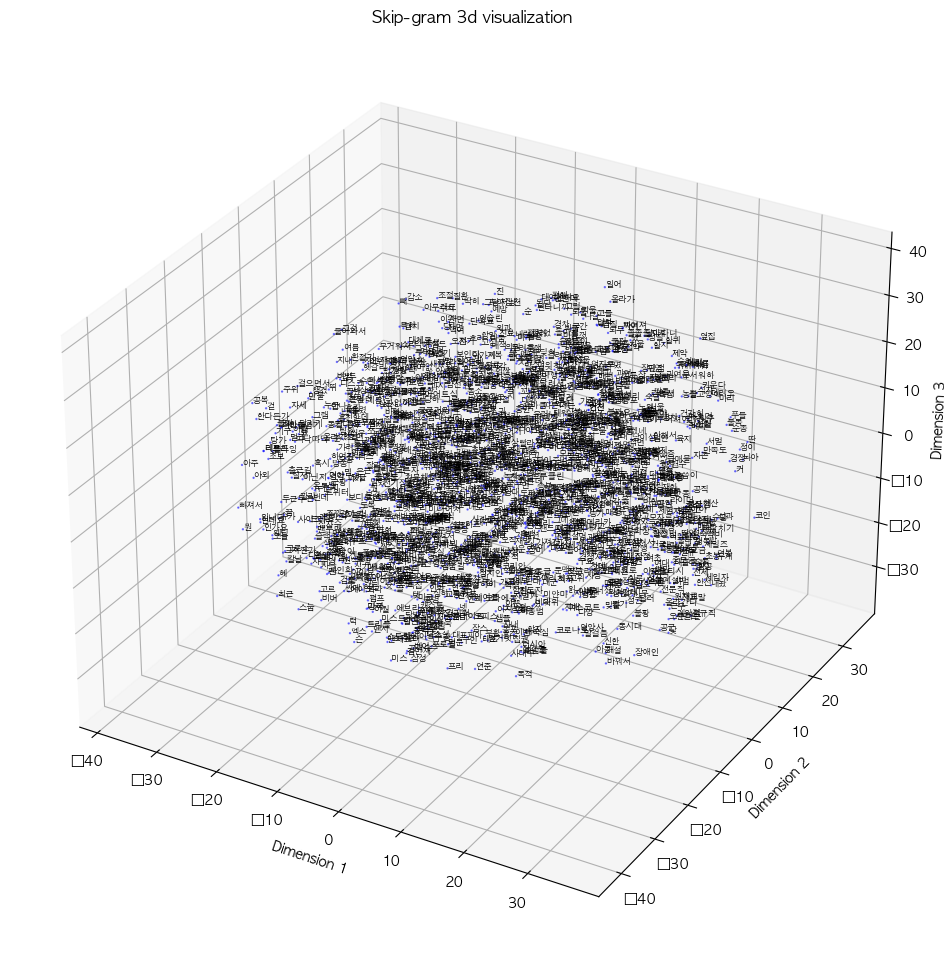

In [177]:
# 3d visualization_skipgram
words = list(skipgram_model.wv.index_to_key)
vectors = [skipgram_model.wv.get_vector(word) for word in words]
vectors = np.array(vectors)

tsne = TSNE(n_components=3, random_state=42)
vectors_3d = tsne.fit_transform(vectors)

subsample_ratio=0.08
subsample_indices = np.random.choice(len(words), size=int(len(words)*subsample_ratio), replace=False)
subsample_words = [words[i] for i in subsample_indices]
subsample_vectors_3d = vectors_3d[subsample_indices]

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(subsample_vectors_3d[:,0], subsample_vectors_3d[:,1], subsample_vectors_3d[:,2], c='blue', alpha=0.5, s=0.5)

for i, word in enumerate(subsample_words):
    ax.text(subsample_vectors_3d[i, 0], subsample_vectors_3d[i,1], subsample_vectors_3d[i,2], word, fontsize=6)

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

plt.title('Skip-gram 3d visualization')
plt.show()

In [178]:
plt.savefig('Skipgram_visualization.jpg')

<Figure size 640x480 with 0 Axes>